# Import required python packages and cleaned dataset

In [200]:
# import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# set pandas to show all columns in DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# set seaborn style
sns.set_style("dark")
sns.set_style("ticks")

In [201]:
# import dataset
saccades_an = pd.read_csv('/Users/Charlie/Desktop/saccades_charac_df.csv')

# view top 5 lines of imported data
saccades_an.head()
saccades_an.tail()

,participant_num,gap_overlap,direction,trial,timepoint,Intervention,saccade_type,collection_camera,status,AverageSpeed(deg/s),MaxSpeed(deg/s),Duration(ms),Latency(ms),saccade_initiation_type,Eye,trial_presentation_number,deg_moved_in_saccade,Experiment,Sex,Age,Weight (kg),Height (m),BMI (kg/m_),VO2max (ml/kg/min),60% VO2max(L/min),Power Output 60% VO2max (W),Target Heart Rate @ Workload (bpm),FEV1/FVC (%),"Habitual Caffeine Use (1 = yes, 0 = no)"
43175,37.00,overlap,left,3.00,b,Reboxetine,Prosaccade,Both,fatigued,210.08,401.35,47.00,179.00,normal,B,98.00,10.24,rave,Female,21,64.65,1.70,22.37,49.00,1.88,117.00,152.00,96.30,0
43176,37.00,gap,right,3.00,b,Reboxetine,Prosaccade,Both,fatigued,241.95,654.05,42.00,144.00,normal,A,99.00,10.59,rave,Female,21,64.65,1.70,22.37,49.00,1.88,117.00,152.00,96.30,0
43177,37.00,gap,right,3.00,b,Reboxetine,Prosaccade,Both,fatigued,261.22,475.92,38.00,144.00,normal,B,99.00,10.27,rave,Female,21,64.65,1.70,22.37,49.00,1.88,117.00,152.00,96.30,0
43178,37.00,overlap,right,3.00,b,Reboxetine,Prosaccade,Both,fatigued,233.59,604.24,43.00,139.00,normal,A,100.00,10.08,rave,Female,21,64.65,1.70,22.37,49.00,1.88,117.00,152.00,96.30,0
43179,37.00,overlap,right,3.00,b,Reboxetine,Prosaccade,Both,fatigued,265.54,466.57,36.00,142.00,normal,B,100.00,9.92,rave,Female,21,64.65,1.70,22.37,49.00,1.88,117.00,152.00,96.30,0


# Purpose of analysis
1. To examine the similarities and differences between catecholamine treatments (DA/NA/CAF) on exercise-induced eye-movement fatigue in saccadic velocity.
2. To examine any influences of VO2max, age, and gender on oculomotor fatigue and responses to treatments intended to mitigate oculomotor fatigue.

## Aim 1
To examine the similarities and differences between catecholamine treatments on exercise-induced eye-movement fatigue (detected in saccade velocity). 
First, lets divide up the dataset into Prosaccades and Antisaccades with a 'normal' initiation type. Then we can generate some summary statistics.

In [202]:
# extract prosaccades with a normal initiation type from the saccades_an dataset
prosaccades = saccades_an[(saccades_an['saccade_type'] == 'Prosaccade') & 
                    (saccades_an['saccade_initiation_type'] == 'normal')]

# extract antisaccades with a normal initiation type from the saccades_an dataset
antisaccades = saccades_an[(saccades_an['saccade_type'] == 'Antisaccade') & 
                    (saccades_an['saccade_initiation_type'] == 'normal')]

## Descriptive analysis
The following analysis just describes means, standard deviations and confidence intervals to look at the max speed of prosaccades when participants are given the intervention in an unfatigued state (either before exercise or in an experiment with no exercise) and in a fatigued state (following three hours of exercise).

In [81]:
# create a summary table of max velocities organised into intervention and 'fatigue' status
# create participant summary based on groups
def percentile(n):
    """percentile function to use in pandas.agg to add percentiles to grouped columns"""
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

# create summary table
fatigue_summary = prosaccades.groupby(['Intervention', 'status']).agg([np.mean, 
                                                                       np.std, 
                                                                       percentile(2.5), 
                                                                       percentile(97.5)])
summary = fatigue_summary['MaxSpeed(deg/s)']
summary

/Users/Charlie/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


mean    std  percentile_2.5  percentile_97.5
Intervention    status                                                   
Bupropion       fatigued   458.70 108.44          261.27           684.66
                unfatigued 458.39  94.91          297.56           680.06
Caffeine        fatigued   484.68 102.16          317.93           718.75
                unfatigued 464.95 100.89          297.07           692.92
Methylphenidate fatigued   519.51 117.28          313.99           773.16
                unfatigued 479.33 113.58          273.30           732.55
Placebo         fatigued   460.84 121.10          254.57           736.34
                unfatigued 469.89 106.42          290.11           713.25
Reboxetine      fatigued   485.68 123.68          259.26           760.32
                unfatigued 507.50 111.74          302.25           760.30

### Create visualizations: distribution plots of prosaccade max velocity across drug intervention and fatigue status

Still working on removing some of the annoying text from the joy plots....

The violin plots are scaled based on the number of observations and have the quartiles of each distribution displayed within the violin splits as 'sticks' or dashed lines.

In [154]:
# Isolate the intervention, status and max speed data for the joy plot
max_velocity = prosaccades[['Intervention', 'status', 'MaxSpeed(deg/s)']]

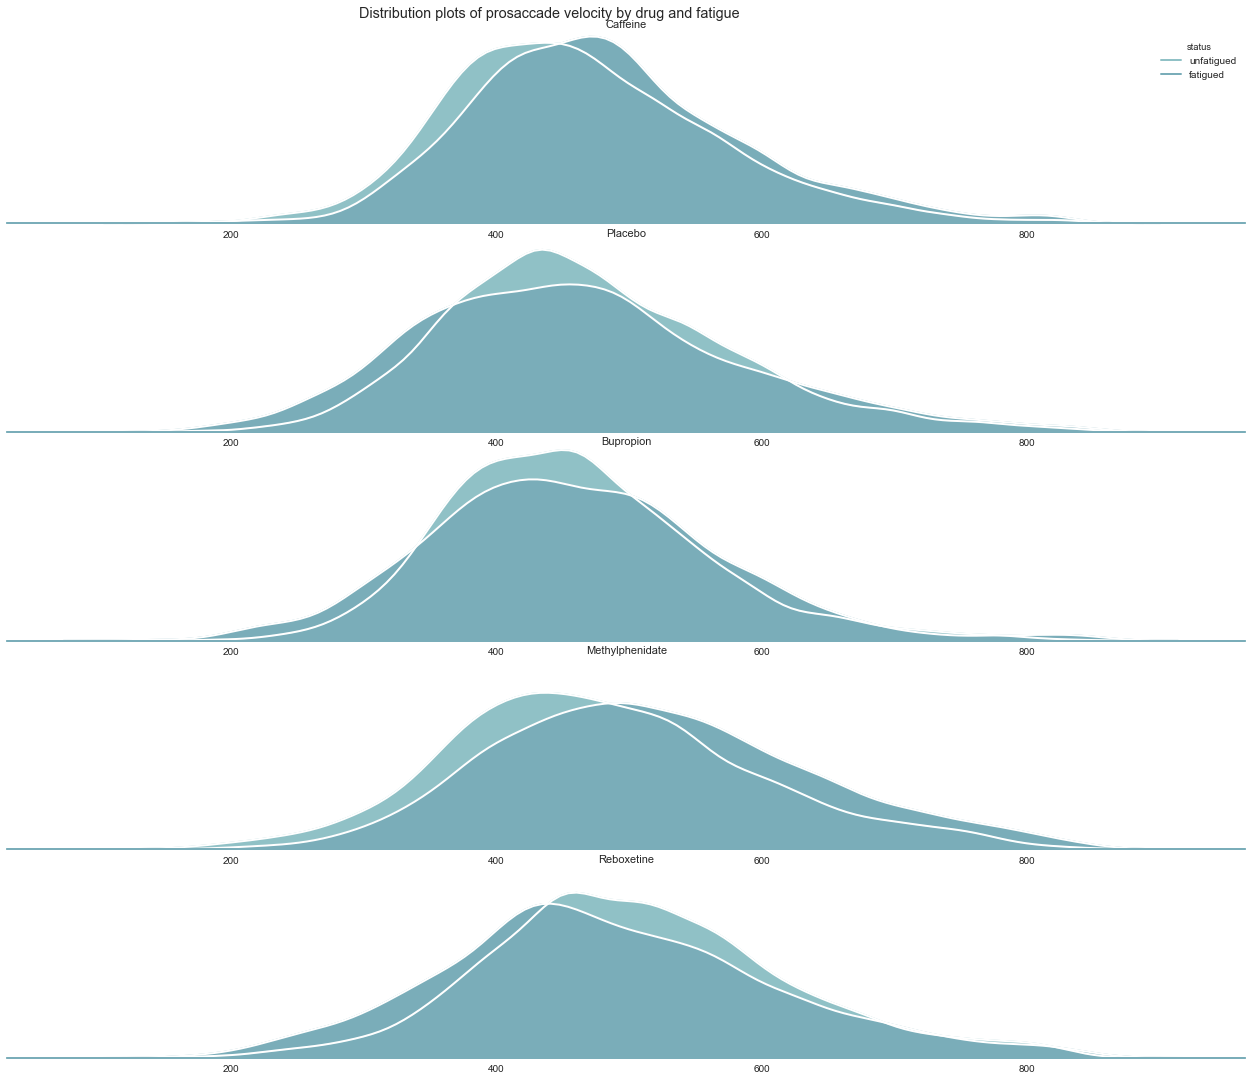

In [185]:
# Create joy plot visualization of distributions of max velocity for each intervention and fatigue
# status

# Initialize the FacetGrid object
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(8, rot=-.25, light=.7)
g = sns.FacetGrid(max_velocity, row='Intervention', hue='status', hue_order=['unfatigued', 'fatigued'],
                  size=3, aspect=6, palette=pal, legend_out=False)

# Draw the densities
g.map(sns.kdeplot, 'MaxSpeed(deg/s)', clip_on=False, shade=True, alpha=1, lw=1.5, bw='silverman')
g.map(sns.kdeplot, 'MaxSpeed(deg/s)', clip_on=False, color="w", lw=2, bw='silverman')
g.map(plt.axhline, y=0, lw=2, clip_on=False)



# Set the subplots to overlap
g.fig.subplots_adjust(hspace=0.1)


# Remove axes details that don't play well with overlap
g.set(yticks=[])
g.despine(bottom=True, left=True)

# add titles
g.fig.suptitle('Distribution plots of prosaccade velocity by drug and fatigue', x=0.60, 
               y=1, horizontalalignment='right')
g.add_legend()
g.set_titles('{row_name}', loc='center')
plt.show()

### Create violin plots

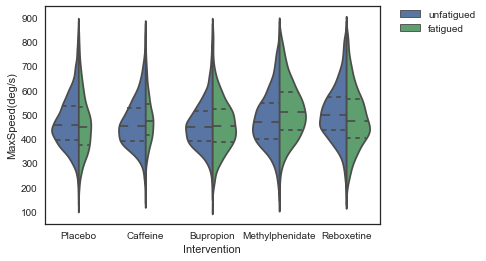

In [196]:
ax = sns.violinplot(x='Intervention', y='MaxSpeed(deg/s)', data=max_velocity, hue='status', 
                    split=True, order=['Placebo', 'Caffeine', 'Bupropion', 'Methylphenidate', 
                                       'Reboxetine'], scale='count', inner='quartile')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Aim 2
To examine any influences of VO2max, age, and gender on oculomotor fatigue and responses to treatments intended to mitigate oculomotor fatigue.

### Add eye movement fatigue classifier
I want to add a classifier that says whether or not the participant exhibited faster, slower or no difference in eye movement speed after the exercise and/or drug intervention.

First step is to group the prosaccade dataset by participant, intervention and timepoint. Next means need to be calculated, followed by the generation of a bootstrap 90% CI. Once this has been down for each participant at each timepoint, I can then use the bounds of the CI to decide if the participant displayed a significant difference in eye movement speed pre to post intervention and/or exercise.

In [203]:
# group the dataset by participant, intervention and timepoint

participant_groups = prosaccades.groupby(['participant_num', 'Intervention'])

# define functions for bootstrapping methods

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))


def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# create participant summary based on groups
def percentile(n):
    """percentile function to use in pandas.agg to add percentiles to grouped columns"""
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [227]:
participant_groups.head(10)

,participant_num,gap_overlap,direction,trial,timepoint,Intervention,saccade_type,collection_camera,status,AverageSpeed(deg/s),MaxSpeed(deg/s),Duration(ms),Latency(ms),saccade_initiation_type,Eye,trial_presentation_number,deg_moved_in_saccade,Experiment,Sex,Age,Weight (kg),Height (m),BMI (kg/m_),VO2max (ml/kg/min),60% VO2max(L/min),Power Output 60% VO2max (W),Target Heart Rate @ Workload (bpm),FEV1/FVC (%),"Habitual Caffeine Use (1 = yes, 0 = no)"
388,1.00,gap,right,1.00,a,Caffeine,Prosaccade,A,unfatigued,253.92,420.43,38.00,205.00,normal,A,1.00,9.49,crave,Female,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1
389,1.00,overlap,right,1.00,a,Caffeine,Prosaccade,A,unfatigued,179.27,475.68,51.00,203.00,normal,A,2.00,8.89,crave,Female,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1
390,1.00,overlap,right,1.00,a,Caffeine,Prosaccade,A,unfatigued,194.92,502.14,46.00,197.00,normal,A,3.00,9.30,crave,Female,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1
391,1.00,overlap,right,1.00,a,Caffeine,Prosaccade,A,unfatigued,215.49,376.03,41.00,207.00,normal,A,4.00,8.84,crave,Female,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1
392,1.00,overlap,right,1.00,a,Caffeine,Prosaccade,A,unfatigued,246.97,433.95,38.00,162.00,normal,A,5.00,9.38,crave,Female,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1
393,1.00,gap,left,1.00,a,Caffeine,Prosaccade,A,unfatigued,220.19,510.00,39.00,177.00,normal,A,6.00,8.84,crave,Female,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1
394,1.00,gap,right,1.00,a,Caffeine,Prosaccade,A,unfatigued,144.00,575.51,61.00,168.00,normal,A,7.00,8.65,crave,Female,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1
395,1.00,overlap,left,1.00,a,Caffeine,Prosaccade,A,unfatigued,208.54,376.78,39.00,191.00,normal,A,8.00,8.46,crave,Female,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1
396,1.00,gap,right,1.00,a,Caffeine,Prosaccade,A,unfatigued,241.08,577.70,39.00,201.00,normal,A,9.00,9.51,crave,Female,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1
397,1.00,gap,left,1.00,a,Caffeine,Prosaccade,A,unfatigued,218.00,577.51,43.00,174.00,normal,A,10.00,9.16,crave,Female,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1


In [229]:
# Bootstrap method to find confidence intervals for each participant at each timepoint.
# Using these confidence intervals, I can classify whether pre to post the participants EM's
# didn't change (2), slowed down(1) or increase in speed(3) by comparing the the upper and lower
# bounds of the CI for the mean speed post relative to the CI for the mean speed pre.

bs_results = pd.DataFrame(columns=['participant_num', 'intervention', 
                                   'EM_change_multinomial(1=slow,2=no_change,3=fast)'])
for name, group in participant_groups:
    
    # isolate timepoints within the group
    pre = group[group['timepoint'] == 'a']
    post = group[group['timepoint'] == 'b']
    
    # isolate pre and post data within groups
    pre_variable = pre['MaxSpeed(deg/s)']
    post_variable = post['MaxSpeed(deg/s)']
    
    
    # Compute 10,000 bootstrap replicates from pre and post data
    bs_replicates_pre = draw_bs_reps(pre_variable, np.mean, size=10000)
    bs_replicates_post = draw_bs_reps(post_variable, np.mean, size=10000)
    
    # Compute  90% CI of the mean for pre and post
    pre_lower_bound, pre_upper_bound = np.percentile(bs_replicates_pre,[5, 95])
    post_lower_bound, post_upper_bound = np.percentile(bs_replicates_post,[5, 95])

    # did eye movements slow, get faster or not change pre to post?
        # boolean argument for slower EMs post
    if post_upper_bound <= pre_lower_bound:
        bs_results.loc[str(name[0]) + '_' + str(name[1])] = [name[0], name[1], 1]
        # boolean argument for faster EMs post
    elif post_lower_bound >= pre_upper_bound:
        bs_results.loc[str(name[0]) + '_' + str(name[1])] = [name[0], name[1], 3]
        # no change in EMs
    else:
        bs_results.loc[str(name[0]) + '_' + str(name[1])] = [name[0], name[1], 2]

In [231]:
bs_results.head(15)

,participant_num,intervention,"EM_change_multinomial(1=slow,2=no_change,3=fast)"
1.0_Caffeine,1.00,Caffeine,1
1.0_Placebo,1.00,Placebo,3
2.0_Caffeine,2.00,Caffeine,2
2.0_Placebo,2.00,Placebo,2
3.0_Caffeine,3.00,Caffeine,2
3.0_Placebo,3.00,Placebo,1
4.0_Caffeine,4.00,Caffeine,2
4.0_Placebo,4.00,Placebo,2
5.0_Caffeine,5.00,Caffeine,3
5.0_Placebo,5.00,Placebo,2


In [232]:
# merge the prosaccades data and the classifier data to create a new dataframe that includes the 
# classifier
pro_fatigue_classifier = pd.merge(prosaccades, bs_results,  how='left', 
                                  left_on=['participant_num','Intervention'], 
                                  right_on = ['participant_num','intervention'])
del pro_fatigue_classifier['intervention']
sex = {'Male': 0, 'Female': 1}
pro_fatigue_classifier['sex'] = pro_fatigue_classifier['Sex'].map(sex)
del pro_fatigue_classifier['Sex']
pro_fatigue_classifier.set_index('participant_num')
pro_fatigue_classifier.head()

,participant_num,gap_overlap,direction,trial,timepoint,Intervention,saccade_type,collection_camera,status,AverageSpeed(deg/s),MaxSpeed(deg/s),Duration(ms),Latency(ms),saccade_initiation_type,Eye,trial_presentation_number,deg_moved_in_saccade,Experiment,Age,Weight (kg),Height (m),BMI (kg/m_),VO2max (ml/kg/min),60% VO2max(L/min),Power Output 60% VO2max (W),Target Heart Rate @ Workload (bpm),FEV1/FVC (%),"Habitual Caffeine Use (1 = yes, 0 = no)","EM_change_multinomial(1=slow,2=no_change,3=fast)",sex
0,1.00,gap,right,1.00,a,Caffeine,Prosaccade,A,unfatigued,253.92,420.43,38.00,205.00,normal,A,1.00,9.49,crave,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1,1,1
1,1.00,overlap,right,1.00,a,Caffeine,Prosaccade,A,unfatigued,179.27,475.68,51.00,203.00,normal,A,2.00,8.89,crave,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1,1,1
2,1.00,overlap,right,1.00,a,Caffeine,Prosaccade,A,unfatigued,194.92,502.14,46.00,197.00,normal,A,3.00,9.30,crave,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1,1,1
3,1.00,overlap,right,1.00,a,Caffeine,Prosaccade,A,unfatigued,215.49,376.03,41.00,207.00,normal,A,4.00,8.84,crave,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1,1,1
4,1.00,overlap,right,1.00,a,Caffeine,Prosaccade,A,unfatigued,246.97,433.95,38.00,162.00,normal,A,5.00,9.38,crave,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1,1,1


In [237]:
# prepare the dataset for input into the logistical regresion

grouping = pro_fatigue_classifier.groupby(['participant_num', 'Experiment', 'Intervention', 'EM_change_multinomial(1=slow,2=no_change,3=fast)']).agg([np.mean])
del grouping['trial']
del grouping['trial_presentation_number']
del grouping['AverageSpeed(deg/s)']
del grouping['Duration(ms)']
del grouping['Latency(ms)']
del grouping['deg_moved_in_saccade']
del grouping['60% VO2max(L/min)']
del grouping['Target Heart Rate @ Workload (bpm)']
del grouping['Power Output 60% VO2max (W)']
del grouping['MaxSpeed(deg/s)']

grouping = grouping.reset_index()


exercise = {'crave': 0, 'feeble': 1, 'rave': 1}
drug_intervention = {'Placebo': 0, 'Caffeine': 1, 'Bupropion': 2, 'Methylphenidate': 3, 
                     'Reboxetine': 4}
grouping['exercise(0=no, 1=yes)'] = grouping['Experiment'].map(exercise)
grouping['Drug'] = grouping['Intervention'].map(drug_intervention)
del grouping['Experiment']
del grouping['Intervention']
del grouping['participant_num']
grouping.dropna(axis=0)
grouping.to_csv('/Users/Charlie/Desktop/prosaccades_mlr_analysis.csv')

In [8]:
# Building a multinomial logistic regression:

# Number of features: 9

# Feature list
# Sex (male: 0 ; female: 1)
# Age (years)
# BMI (kg/m squared)
# Weight (kg)
# Height (m)
# VO2max (aerobic capacity) (ml/kg/min)
# Habitual caffeine use (1: yes ; 0: no)
# Drug Intervention ('Placebo': 0, 'Caffeine': 1, 'Bupropion': 2, 'Methylphenidate': 3, 'Reboxetine': 4)
# 3 hr exercise intervention (1: yes; 0: no)
# FEV1 / FVC (%)

# Target: Change in prosaccade velocity. There are 3 possible 'changes':
# 1: prosaccades got slower
# 2: prosaccades didn't change
# 3: prosaccades got faster

In [ ]:
# import required packages
from sklearn import linear_model
from sklearn import metrics
from sklearn.cross_validation import train_test_split
 
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('charlieconnell', 'X40ivNuftfVYw5rX9z44')

# data summary
print ('Number of observations :: ', len(data.index))
print ('Number of columns :: ', len(data.columns))
print ('Headers :: ', data.columns.values)

In [ ]:
# functions to create density graphs for all features
def scatter_with_color_dimension_graph(feature, target, layout_labels):
    """
    Scatter with color dimension graph to visualize the density of the
    Given feature with target
    :param feature:
    :param target:
    :param layout_labels:
    :return:
    """
    trace1 = go.Scatter(
        y=feature,
        mode='markers',
        marker=dict(
            size='16',
            color=target,
            colorscale='Viridis',
            showscale=True
        )
    )
    layout = go.Layout(
        title=layout_labels[2],
        xaxis=dict(title=layout_labels[0]), yaxis=dict(title=layout_labels[1]))
    data = [trace1]
    fig = Figure(data=data, layout=layout)
    # plot_url = py.plot(fig)
    py.image.save_as(fig, filename=layout_labels[1] + '_Density.png')
    
def create_density_graph(dataset, features_header, target_header):
    """
    Create density graph for each feature with target
    :param dataset:
    :param features_header:
    :param target_header:
    :return:
    """
    for feature_header in features_header:
        print "Creating density graph for feature:: {} ".format(feature_header)
        layout_headers = ["Number of Observation", feature_header + " & " + target_header,
                          feature_header + " & " + target_header + " Density Graph"]
        scatter_with_color_dimension_graph(dataset[feature_header], dataset[target_header], layout_headers)

In [ ]:

def main():
    data = data
    glass_data_headers = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "glass-type"]
    create_density_graph(glass_data, glass_data_headers[1:-1], glass_data_headers[-1])
 
if __name__ == "__main__":
    main()